In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy 
import sys
import pickle
sys.path.append('../functions')
import hexbin_functions as hexfunc

In [8]:
mask_file = '/storage/shared/oceanparcels/input_data/NEMO_Ensemble/GRID/NATL025-CJMenobs01_byte_mask.nc'
mask = xr.open_dataset(mask_file, decode_times=False)

with open('../data/hexgrid_no_coast_h3.pkl', 'rb') as f:
    hexagons_grid = pickle.load(f)
    
grid = hexfunc.hexGrid(hexagons_grid)

In [3]:

location = 'Cape_Hatteras'
member = 3 # memeber
delta_r = 2 # Standard deviation od initial dispersion

file_path = f"/storage/shared/oceanparcels/output_data/data_Claudio/NEMO_Ensemble/{location}/spatial/dr_{delta_r*100:03.0f}/{location}_dr{delta_r*100:03.0f}_m{member:03d}.zarr"
pset = xr.open_zarr(file_path)
pset.compute()

<xarray.Dataset> Size: 35MB
Dimensions:     (trajectory: 1001, obs: 730)
Coordinates:
  * obs         (obs) int32 3kB 0 1 2 3 4 5 6 7 ... 723 724 725 726 727 728 729
  * trajectory  (trajectory) int64 8kB 0 1 2 3 4 5 ... 995 996 997 998 999 1000
Data variables:
    hexbin_id   (trajectory, obs) float32 3MB -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0
    lat         (trajectory, obs) float64 6MB 35.61 35.58 35.53 ... 30.55 30.56
    lon         (trajectory, obs) float64 6MB -73.61 -73.53 ... -54.19 -54.27
    time        (trajectory, obs) datetime64[ns] 6MB 2010-01-02 ... 2012-01-01
    u           (trajectory, obs) float32 3MB 9.646e-07 1.075e-06 ... -8.726e-07
    v           (trajectory, obs) float32 3MB -2.914e-07 ... 1.345e-07
    w           (trajectory, obs) float32 3MB 5.466e-07 3.33e-07 ... 4.859e-08
    z           (trajectory, obs) float64 6MB 1.0 1.036 1.063 ... 0.5447 0.5448
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

In [4]:
pset

<xarray.Dataset> Size: 35MB
Dimensions:     (trajectory: 1001, obs: 730)
Coordinates:
  * obs         (obs) int32 3kB 0 1 2 3 4 5 6 7 ... 723 724 725 726 727 728 729
  * trajectory  (trajectory) int64 8kB 0 1 2 3 4 5 ... 995 996 997 998 999 1000
Data variables:
    hexbin_id   (trajectory, obs) float32 3MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    lat         (trajectory, obs) float64 6MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    lon         (trajectory, obs) float64 6MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    time        (trajectory, obs) datetime64[ns] 6MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    u           (trajectory, obs) float32 3MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    v           (trajectory, obs) float32 3MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    w           (trajectory, obs) float32 3MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
    z           (trajectory, obs) float64 6MB dask.array<chunksize=(1001, 1), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.6/CF-1.7
    feature_type:           trajectory
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_kernels:        EnsembleParticleAdvectionRK4_3DSampleFieldKeepInO...
    parcels_mesh:           spherical
    parcels_version:        3.0.2

In [5]:
pset['time'][729, 0].values

numpy.datetime64('2010-01-02T00:00:00.000000000')

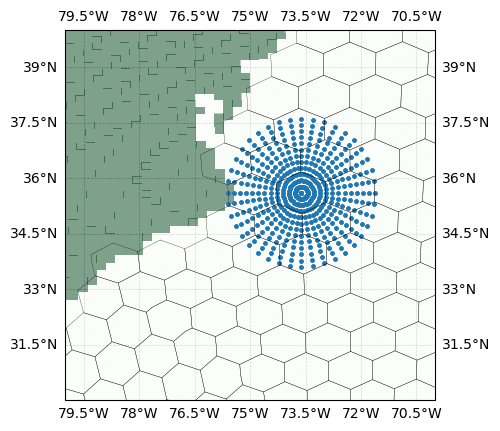

In [10]:
# Plot NA_domain on a map
depth = 0
t = 0

fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-80, -70, 30, 40], crs=cartopy.crs.PlateCarree())
# ax.set_extent([-80, -60, 28, 37], crs=cartopy.crs.PlateCarree())
# ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)
# hexfunc.pcolorhex(ax, grid_raw, colors='r', draw_edges=True, fill_polygons=False)
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='Greens_r', alpha=0.5)

ax.scatter(pset.lon[:, t], pset.lat[:, t], s=5)

hexfunc.plot_hexagons(ax, hexagons_grid, colors='r', draw_edges=True, fill_polygons=False)
    # ax.plot(pset.lon[i,:], pset.lat[i,:])

In [16]:
pset.lon[:, 0].max().values - 2

-73.61184289610455

> Obs: Careful with step zero. No son las posiciones initiales de todas las particulas. 

## Make hexbin histograms with all the variability of the ensembles

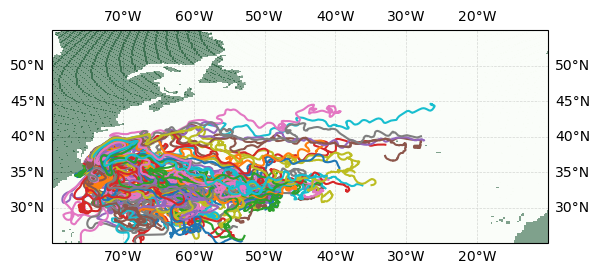

In [43]:
# Plot NA_domain on a map
depth = 0
fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-80, -10, 25, 55], crs=cartopy.crs.PlateCarree())
# ax.set_extent([-80, -60, 28, 37], crs=cartopy.crs.PlateCarree())
# ax.coastlines()
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)
# hexfunc.pcolorhex(ax, grid_raw, colors='r', draw_edges=True, fill_polygons=False)
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='Greens_r', alpha=0.5)
for i in range(100):
    # ax.scatter(pset.lon[i,0], pset.lat[i,0], s=1)
    ax.plot(pset.lon[i,:], pset.lat[i,:])

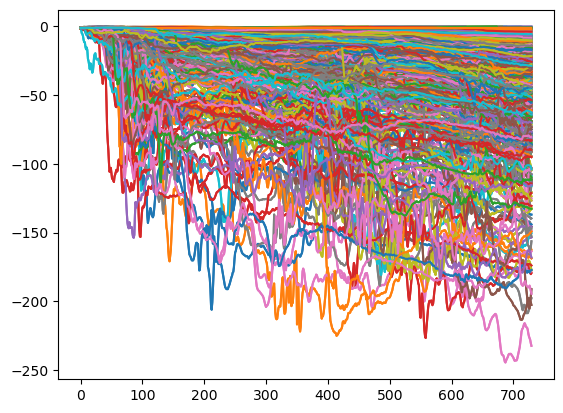

In [44]:
for i in range(1000):
    plt.plot(-pset.z[i,:])

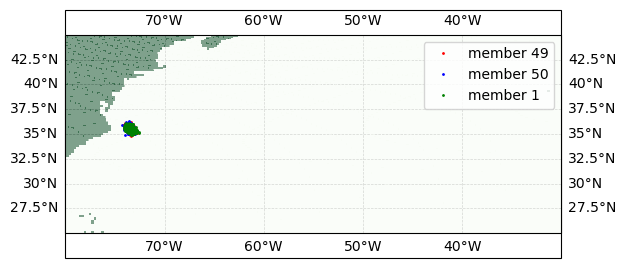

In [41]:
# create animation of the particles in the domain
import matplotlib.animation as animation

fig = plt.figure()
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.set_extent([-80, -30, 25, 45], crs=cartopy.crs.PlateCarree())
ax.gridlines(draw_labels=True, zorder=0, linestyle='--', linewidth=0.5)
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0,depth,:,:], cmap='Greens_r', alpha=0.5)
line, = ax.plot([], [], 'o', markersize=1, color='r')
line2, = ax.plot([], [], 'o', markersize=1, color='b')
line3, = ax.plot([], [], 'o', markersize=1, color='g')
ax.legend(['member 49', 'member 50', 'member 1'])
def init():
    line.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    return line, line2, line3
def animate(i):
    line.set_data(pset.lon[:1000,i], pset.lat[:1000,i])
    line2.set_data(pset_1.lon[1000:2000,i], pset_1.lat[1000:2000,i])
    line3.set_data(pset_2.lon[2000:3000,i], pset_2.lat[2000:3000,i])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=100, interval=100, blit=True)


In [42]:
# display animation in jupyter notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

# save animation to file
ani.save('anim_std02_m49-50-01.gif', writer='imagemagick', fps=10)

KeyboardInterrupt: 